Find the solution to ODE 
$$f''' + ff'' + 1 - (f')^2 = 0$$
And the boundary conditions are
$$f_0 = f(0) = 0 = f'_0 = f'(0)$$
$$f'_{n} = f'(10) = 1$$
To simplify our calculations we take  $ f' = F$

Now our equations become 
$$f_0 = f(0) = 0 = F_0 = F(0)$$
$$F_{n} = F(10) = 1$$

And we solve for the equation with 
$$ X_{i} = \begin{bmatrix}
   f_{i} \\  F_{i} \\
   \end{bmatrix}
  $$

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 15]

In [4]:
def BlockTridiagonal(A, B, C, D):
    n = len(D)
    _B = np.zeros((n, 2, 2))
    _C = np.zeros(A.shape)
    _D = np.zeros((n,2,1))
    D_out = np.zeros(_D.shape)
    _C[0] = np.linalg.inv(B[0]).dot(C[0])
    _D[0] = np.linalg.inv(B[0]).dot(D[0])
    for i in range(1, n-1):
        _B[i] = B[i] - A[i-1].dot(_C[i-1])
        _C[i] = np.linalg.inv(_B[i]).dot(C[i])
        _D[i] = np.linalg.inv(_B[i]).dot(D[i] - A[i-1].dot(_D[i-1]))
    _D[n-1] = np.linalg.inv(B[n-1] - A[n-2].dot(_C[n-2])).dot(D[n-1] - A[n-2].dot(_D[n-2]))
    D_out[n-1] = np.copy(_D[n-1])
    for i in range(n-2, -1, -1):
        D_out[i] = _D[i] - _C[i].dot(D_out[i+1])
    
    return D_out

In [13]:
def BVP(x0, xn, h, epsilon = 0.001):
    n = int(np.ceil((xn - x0)/h)+1)
    print(n)
    A = np.zeros((n-2, 2, 2))
    B = np.zeros((n-1, 2, 2))
    C = np.zeros((n-2, 2, 2))
    D = np.zeros((n-1, 2, 1))
    f = np.zeros(n)
    F = np.zeros(n)
    F[n-1] = 1
    f[n-1] = h/2
    Solution = np.stack((f, F))
    print("Solution Shape", Solution.shape)
    count = 0
    delta_X = np.ones(Solution.shape)
    while(np.amax(np.absolute(delta_X))>epsilon):
        print("Iteration : ", count+1)
        B[0] = np.array([[1, -h/2],
                         [(Solution[1][2] - Solution[1][0])/(2*h), -2/h**2 - 2*Solution[1][1] ]])
        C[0] = np.array([[0, 0],
                         [0, 1/h**2 + Solution[0][1]/(2*h)]])
        A[n-3] = np.array([[-1, -h/2], 
                             [0, 1/h**2 - Solution[0][-2]/2*h]])
        B[n-2] = np.array([[1, -h/2], 
                             [(Solution[-1][-1] - Solution[1][-3])/2*h, -2/h**2 - 2*Solution[1][-2]]])
        D[0] = np.array([[-Solution[0][1] + Solution[0][0] + h*(Solution[1][1] + Solution[1][0])/2],
                             [Solution[1][1]**2 - 1 - Solution[0][1]*(Solution[1][2] - Solution[1][0])/2*h - (Solution[1][0] + Solution[1][2] -2*Solution[1][1])/h**2]])
        D[n-2] = np.array([[-Solution[0][-2] + Solution[0][-3] + h*(Solution[1][-2] + Solution[1][-3])/2],
                             [Solution[1][-2]**2 - 1 - Solution[0][-2]*(Solution[1][-1] - Solution[1][-3])/2*h - (Solution[1][-3] + Solution[1][-1] -2*Solution[1][-2])/h**2]])
        
        for i in range(1, n-2):
            A[i-1] = np.array([[-1, -h/2], 
                             [0, 1/h**2 - Solution[0][i]/2*h]])
            B[i] = np.array([[1, -h/2], 
                             [(Solution[1][i+2] - Solution[1][i])/2*h, -2/h**2 - 2*Solution[1][i+1]]])
            C[i] = np.array([[0, 0], 
                             [0, 1/h**2 + Solution[0][i+1]/2*h]])
            D[i] = np.array([[-Solution[0][i+1] + Solution[0][i] + h*(Solution[1][i+1] + Solution[1][i])/2],
                             [Solution[1][i+1]**2 - 1 - Solution[0][i+1]*(Solution[1][i+2] - Solution[1][i])/2*h - (Solution[1][i] + Solution[1][i+2] -2*Solution[1][i+1])/h**2]])
        print(delta_X.shape)
        delta_X = np.reshape(BlockTridiagonal(A, B, C, D), (n-1, 2)).T
        print(delt)
        b = np.array([[0],[0]])
        delta_X = np.concatenate([b, delta_X], axis=1)

        delta_X[1][-1] = 0
        delta_X[0][-1] = delta_X[0][-2] + h*(delta_X[1][-1] + delta_X[1][-2])/2
        Solution = Solution + delta_X
#         print(Solution)
        count+= 1
    
    print(Solution)
    return Solution[0, :]

In [17]:
def func(x0, xn, h = 0.1):
    lst = np.arange(x0, xn, h)
    lst = np.append(lst, xn)
    return lst
x0 = 0
xn = 10
x = func(x0, xn, h = 0.4)
solution = BVP(x0, xn, h=0.4, epsilon=0.05)

26
Solution Shape (2, 26)
Iteration :  1
(2, 26)
(2, 25)
Iteration :  2
(2, 26)
(2, 25)
Iteration :  3
(2, 26)
(2, 25)
Iteration :  4
(2, 26)
(2, 25)
Iteration :  5
(2, 26)
(2, 25)
Iteration :  6
(2, 26)
(2, 25)
Iteration :  7
(2, 26)
(2, 25)
Iteration :  8
(2, 26)
(2, 25)
[[0.         0.0778352  0.28386767 0.5710348  0.90707113 1.2715566
  1.65219039 2.04180576 2.4363298  2.83349484 3.23206186 3.63136698
  4.0310631  4.43097615 4.83102695 5.2311905  5.63147613 6.03191984
  6.43258376 6.83356083 7.23498349 7.63703658 8.03997465 8.44414467
  8.85001456 9.25344153]
 [0.         0.38917601 0.64098632 0.79484935 0.88533228 0.93709507
  0.96607386 0.98200303 0.99061717 0.99520803 0.99762706 0.99889849
  0.99958214 0.99998309 1.00027093 1.00054681 1.00088139 1.00133712
  1.00198248 1.00290286 1.00421047 1.00605494 1.00863542 1.01221466
  1.01713482 1.        ]]


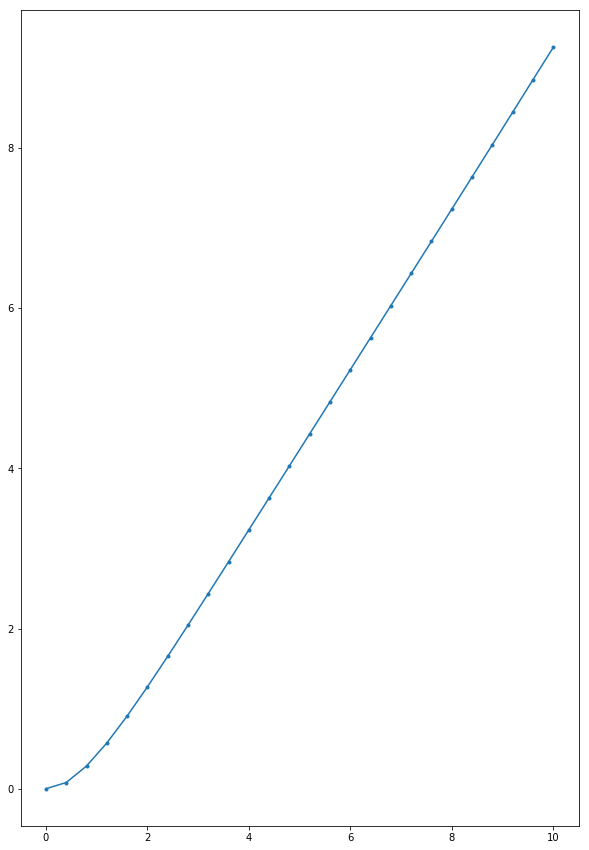

In [18]:
plt.plot(x, solution, '.-')